<a href="https://www.kaggle.com/code/sanjanchaudhari/employee-performance-for-hr-analytics?scriptVersionId=137369253" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://netchex.com/wp-content/uploads/2022/12/HR-Analytics-768x512.png)

<center><h1 style="background-color:blue; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman;" >Import necessary libraries 🏤📚</h1></center>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

<center><h1 style="background-color:blue; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman;" >Import the dataset 💾 </h1></center>

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/employees-performance-for-hr-analytics/Uncleaned_employees_final_dataset (1).csv


<center><h1 style="background-color:blue; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman;" >Read the dataset 💾 </h1></center>

In [3]:
hr=pd.read_csv("/kaggle/input/employees-performance-for-hr-analytics/Uncleaned_employees_final_dataset (1).csv")
hr.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


<center><h1 style="background-color:blue; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman;" >Understanding the dataset 💾 </h1></center>

In [4]:
# 1. Check the dimensions of the dataset
print("Dimensions of the dataset (rows, columns):", hr.shape)

Dimensions of the dataset (rows, columns): (17417, 13)


In [5]:

# 2. Get a summary of the data types, non-null counts, and memory usage
print("\nData Summary:")
print(hr.info())



Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB
None


In [6]:
# 3. Check the column names
print("\nColumn Names:")
print(hr.columns)


Column Names:
Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')


In [7]:
# 4. Rename the column names
hr.rename(columns={'employee_id':'Employee_ID', 'department':'Department', 'region':'Region', 'education':'Education', 'gender':'Gender',
       'recruitment_channel':'Recruitment_Channel', 'no_of_trainings':'No_of_Trainings', 'age':'Age', 'previous_year_rating':'Previous_Year_Rating',
       'length_of_service':'Length_of_Service', 'KPIs_met_more_than_80':'KPIs_Met_More_Than_80', 'awards_won':'Awards_Won',
       'avg_training_score':'Avg_Training_Score'},inplace=True)

<center><h1 style="background-color:blue; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman;" >Cleaning on the dataset 💾 </h1></center>

In [8]:
# Check null values
print("\nHow many null values present in the column")
print(hr.isnull().sum())


How many null values present in the column
Employee_ID                 0
Department                  0
Region                      0
Education                 771
Gender                      0
Recruitment_Channel         0
No_of_Trainings             0
Age                         0
Previous_Year_Rating     1363
Length_of_Service           0
KPIs_Met_More_Than_80       0
Awards_Won                  0
Avg_Training_Score          0
dtype: int64


In [9]:
#fill the null values
hr['Previous_Year_Rating'].fillna(hr['Previous_Year_Rating'].mean(), inplace=True)
hr['Education'].fillna(method='bfill', inplace=True)

In [10]:
#check duplicate value
hr.duplicated().sum()

2

<center><h1 style="background-color:blue; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman;" >Descriptive Statistics </h1></center>

In [11]:
hr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Employee_ID,17417.0,39083.491129,22707.024087,3.0,19281.0,39122.0,58838.0,78295.0
No_of_Trainings,17417.0,1.250732,0.595692,1.0,1.0,1.0,1.0,9.0
Age,17417.0,34.807774,7.694046,20.0,29.0,33.0,39.0,60.0
Previous_Year_Rating,17417.0,3.345459,1.214862,1.0,3.0,3.0,4.0,5.0
Length_of_Service,17417.0,5.801860,4.175533,1.0,3.0,5.0,7.0,34.0
KPIs_Met_More_Than_80,17417.0,0.358845,0.479675,0.0,0.0,0.0,1.0,1.0
Awards_Won,17417.0,0.023368,0.151074,0.0,0.0,0.0,0.0,1.0
Avg_Training_Score,17417.0,63.176322,13.418179,39.0,51.0,60.0,75.0,99.0


<center><h1 style="background-color:blue; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman;" >Data Visualization </h1></center>

# 1. Plot Histograms or Boxplots for Numerical Variables:-

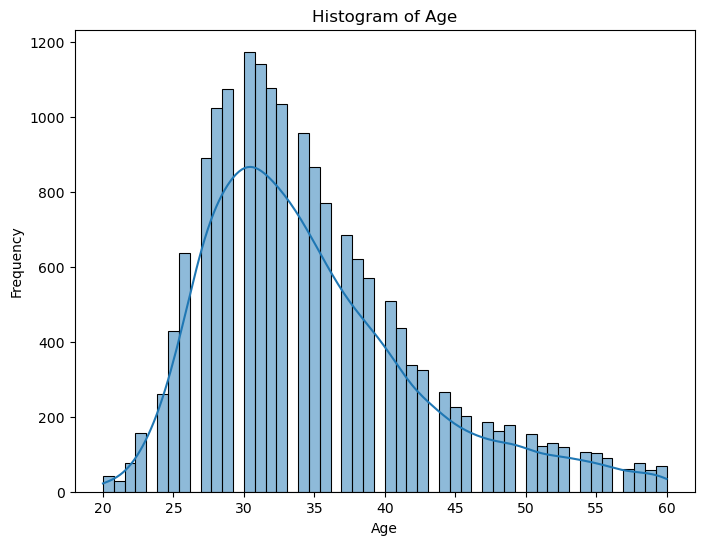

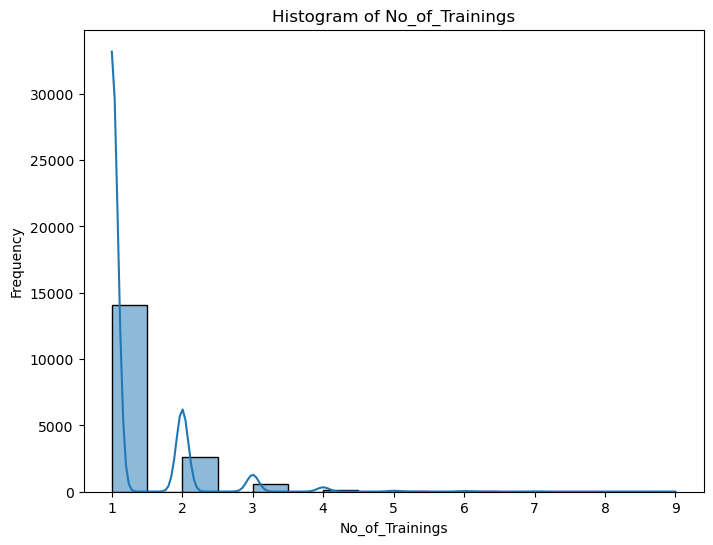

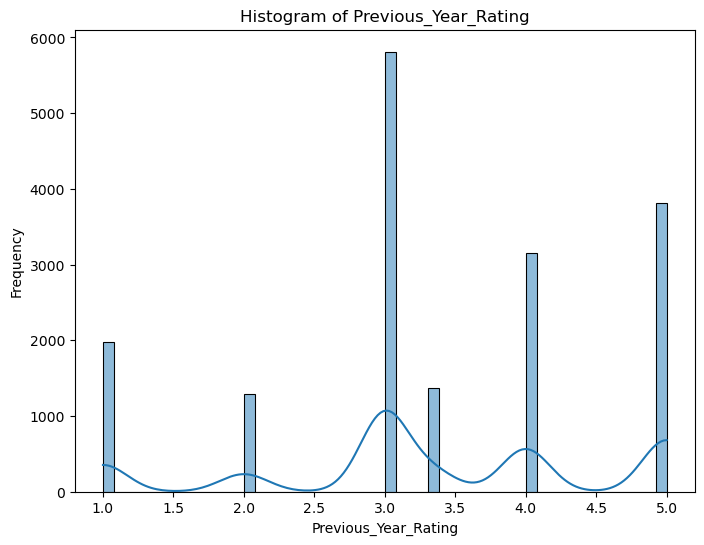

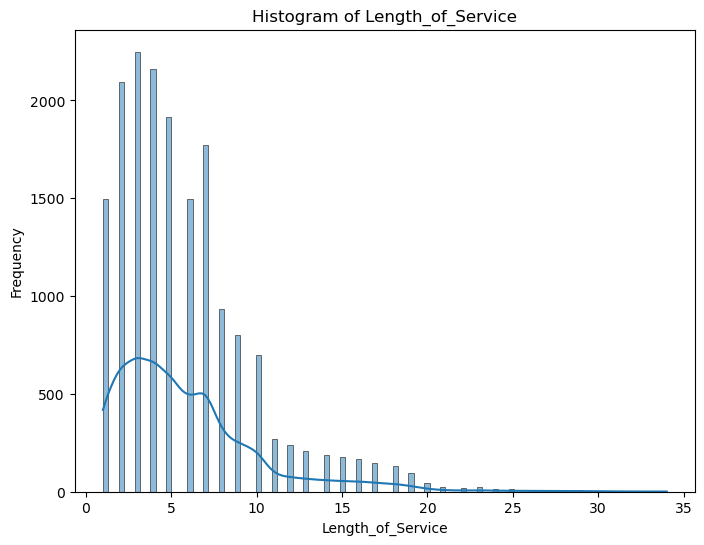

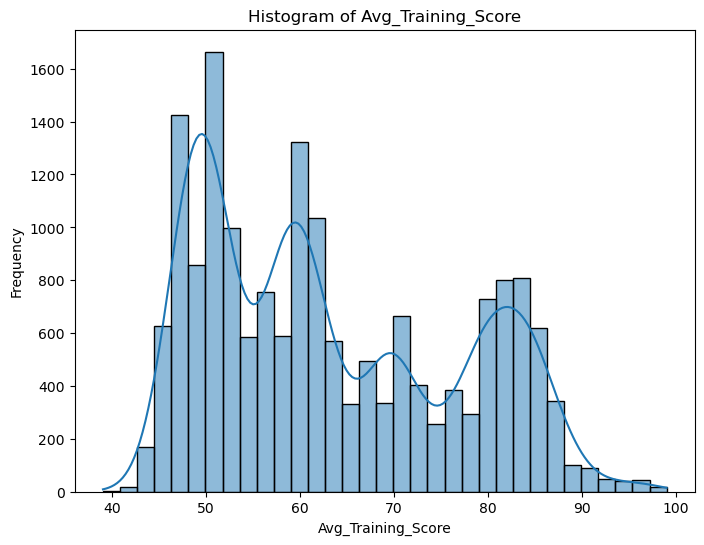

In [12]:
# Assuming you have the DataFrame 'hr' with numerical columns
numerical_columns = ['Age', 'No_of_Trainings', 'Previous_Year_Rating', 'Length_of_Service', 'Avg_Training_Score']

# Plot histograms for numerical variables
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(hr[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


# 2. Plot boxplots for numerical variables

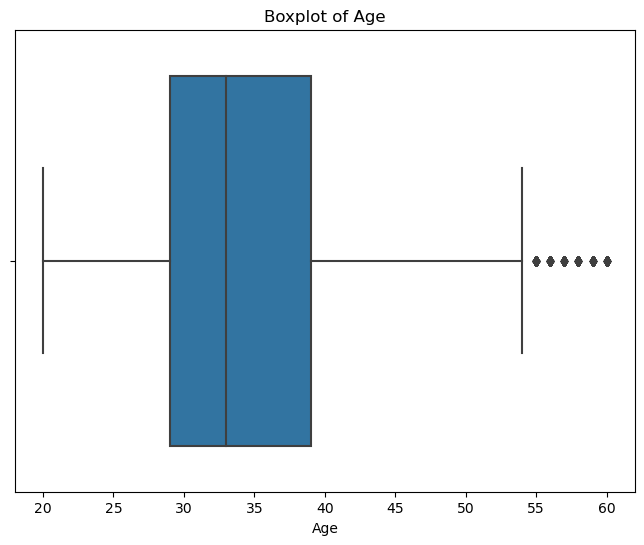

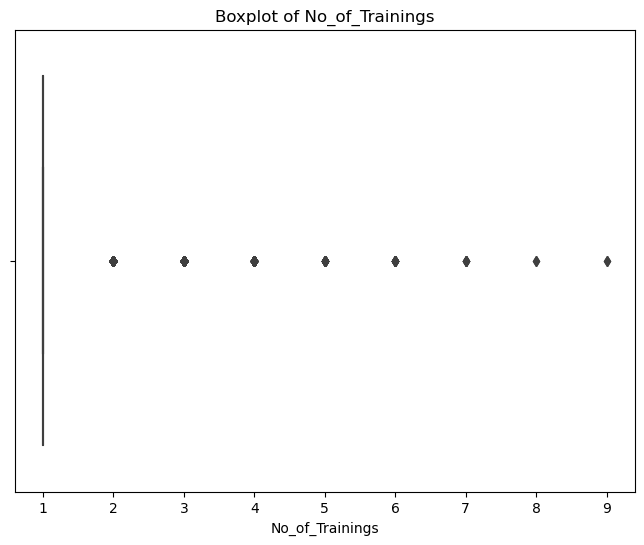

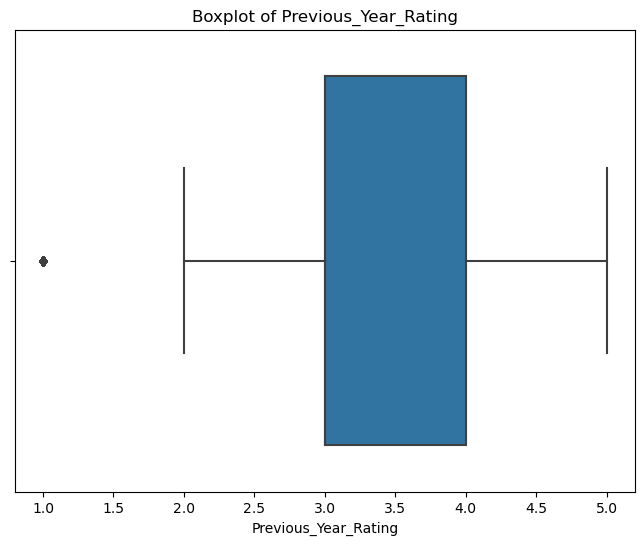

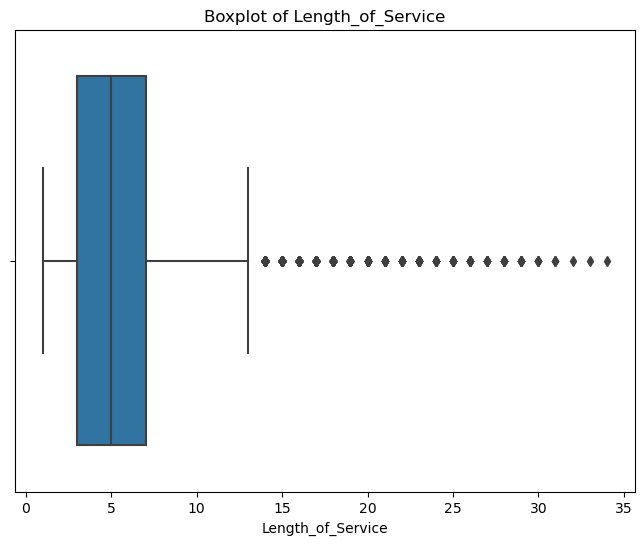

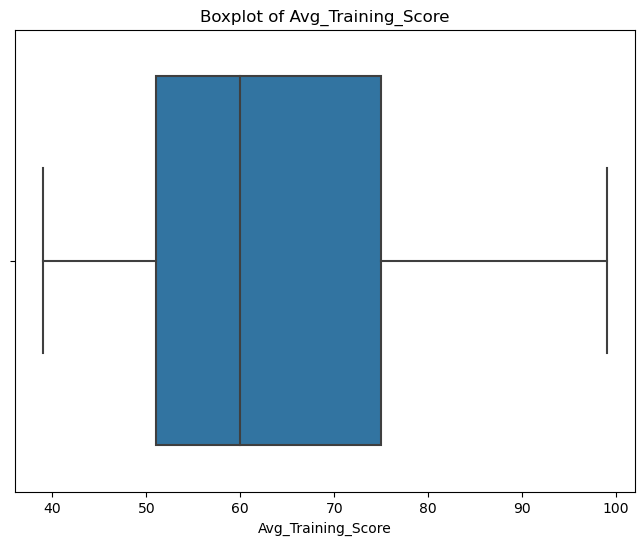

In [13]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=hr[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

# 3. Use Bar Charts or Pie Charts for Categorical Variables:

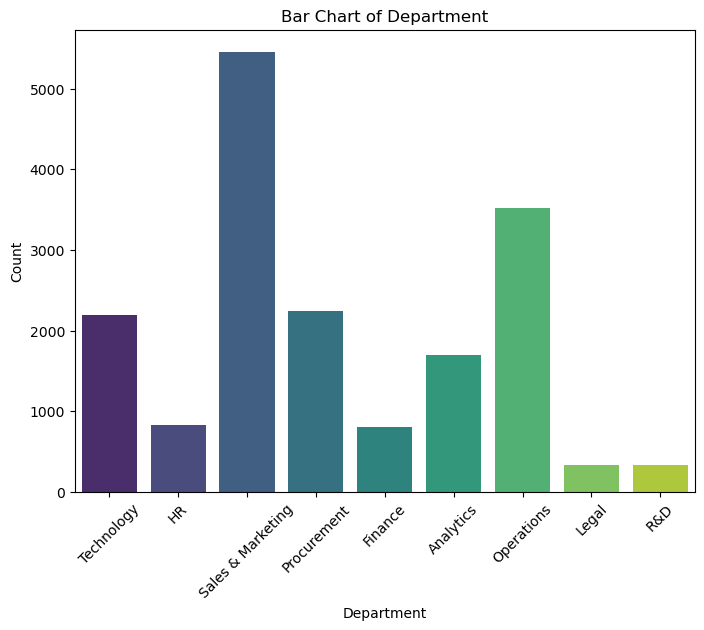

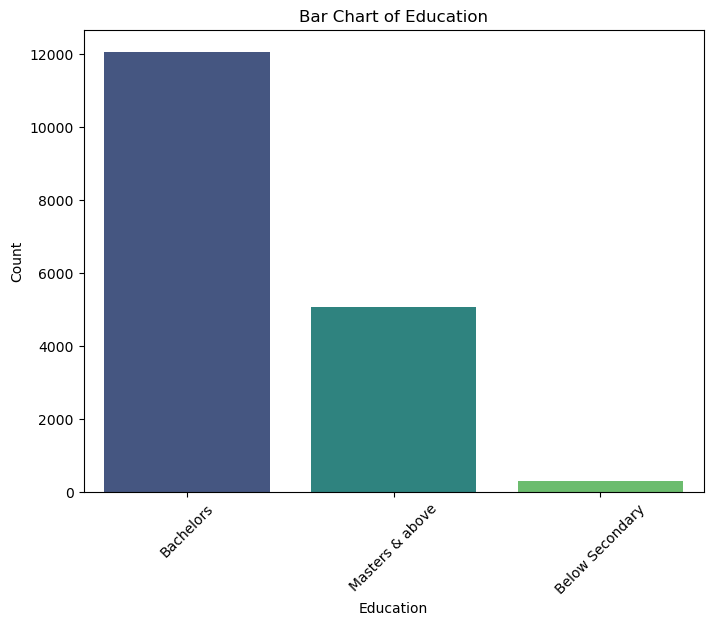

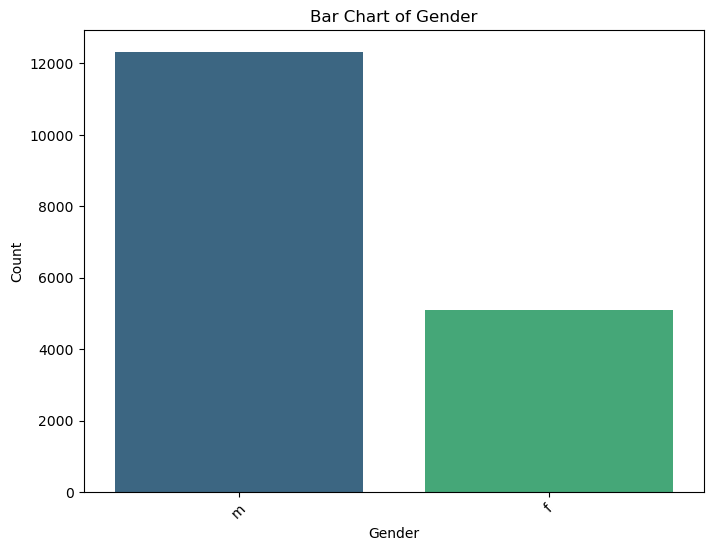

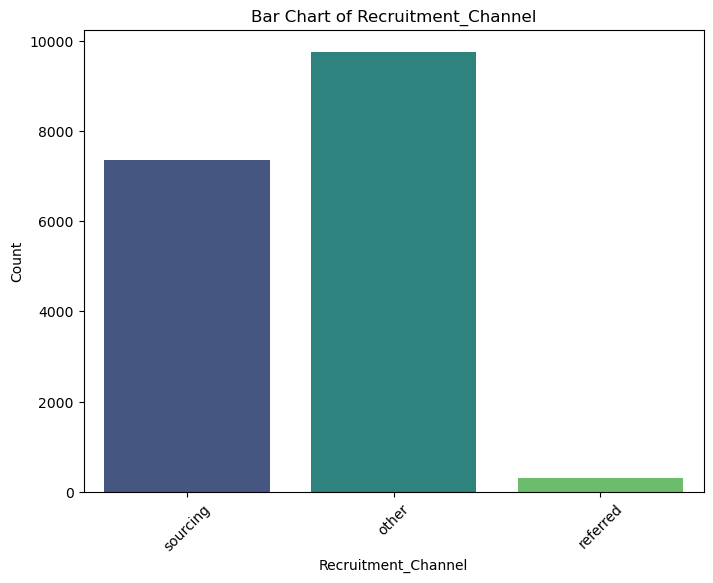

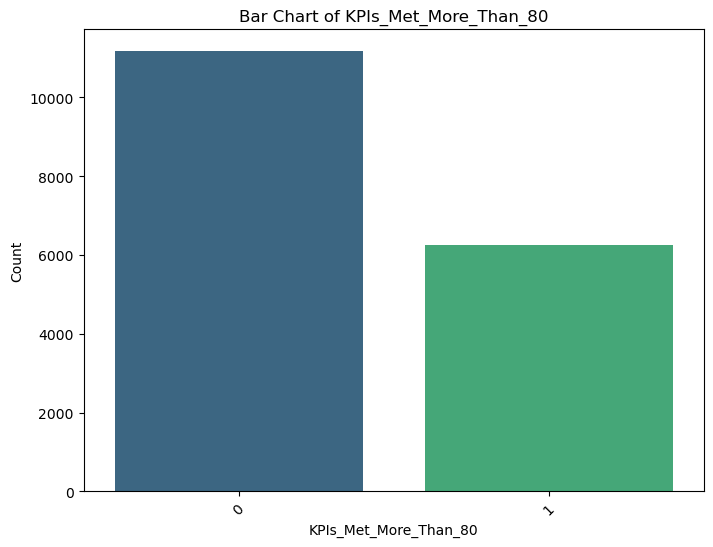

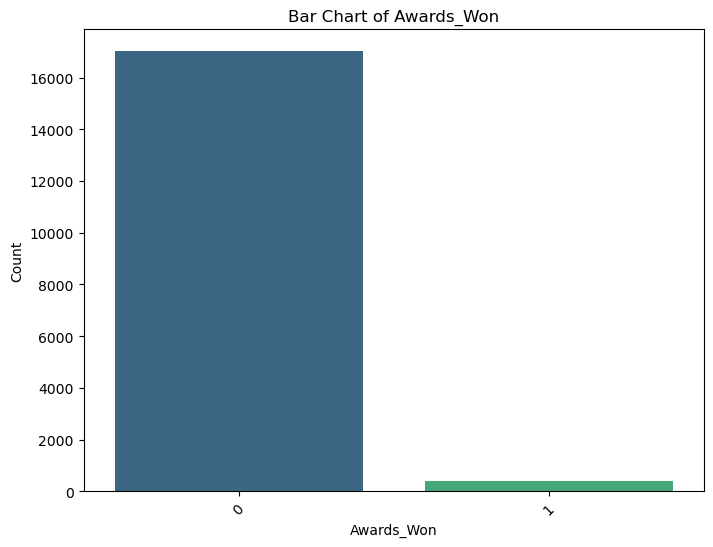

In [14]:
# Assuming you have the DataFrame 'hr' with categorical columns
categorical_columns = ['Department', 'Education', 'Gender', 'Recruitment_Channel', 'KPIs_Met_More_Than_80', 'Awards_Won']

# Plot bar charts for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=hr, palette='viridis')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


# 4. Plot pie charts for categorical variables

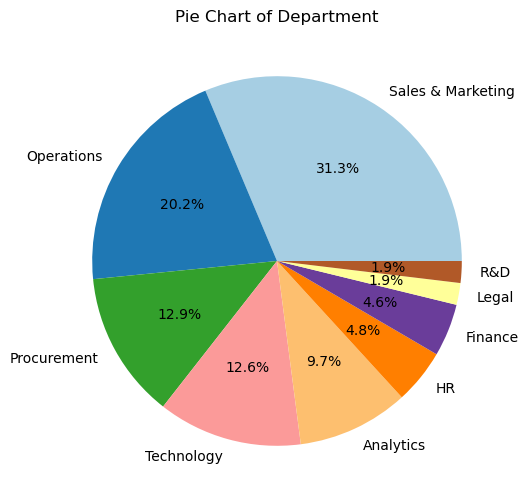

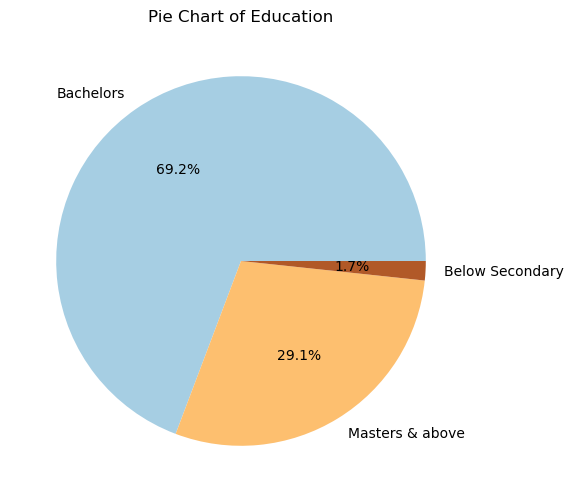

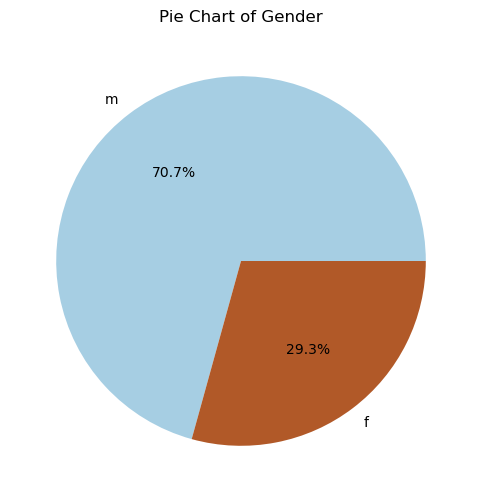

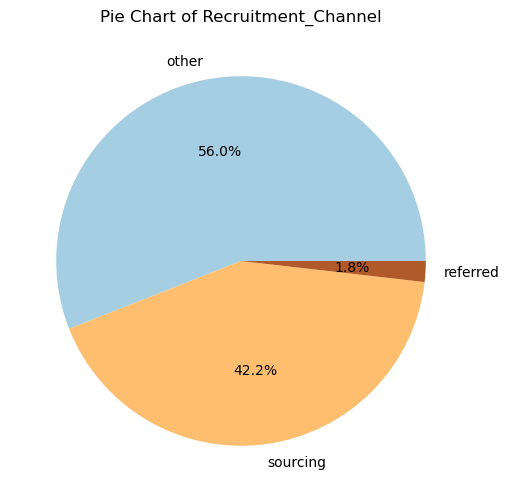

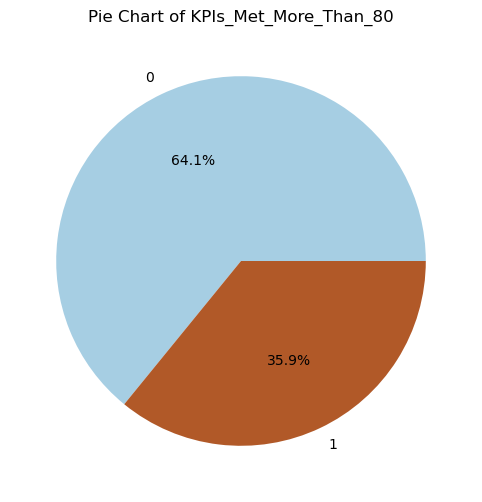

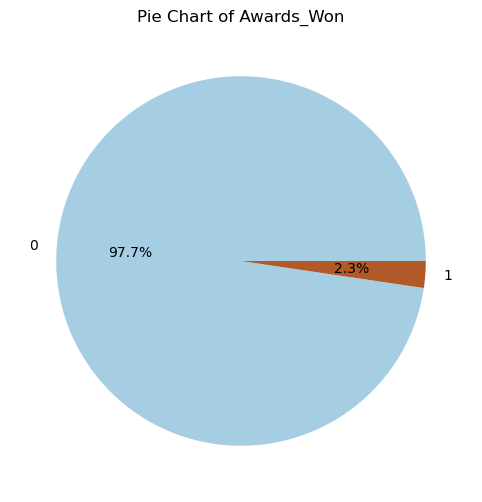

In [15]:
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    hr[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='Paired')
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('')
    plt.show()


# 5. Create Scatter Plots or Line Plots for Interesting Relationships:

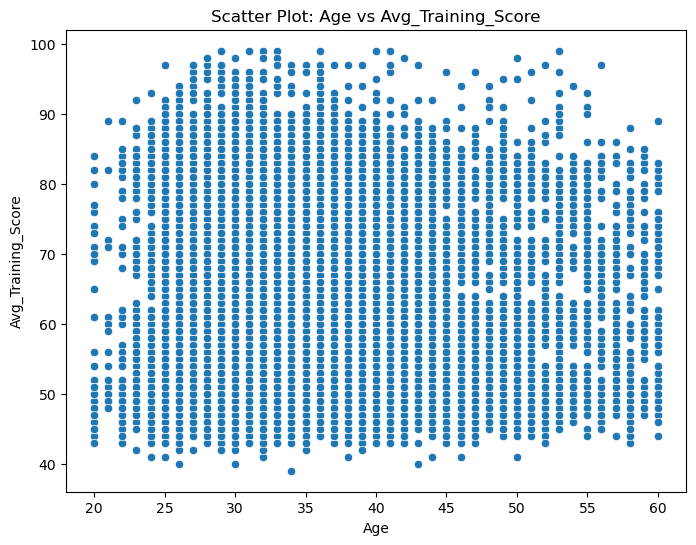

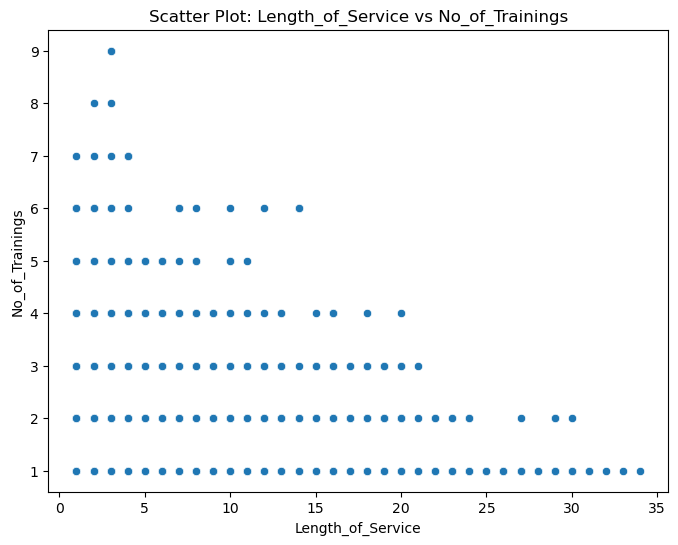

In [16]:
# Assuming you want to create scatter plots or line plots between two numerical variables
interesting_relationships = [('Age', 'Avg_Training_Score'), ('Length_of_Service', 'No_of_Trainings')]

# Create scatter plots
for x, y in interesting_relationships:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y, data=hr)
    plt.title(f'Scatter Plot: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Create line plots (if applicable)
# For example, if you have time-series data and want to plot the trend over time
# You can use sns.lineplot() for time series data visualization.
# This example assumes there is a 'Date' column in the DataFrame
# sns.lineplot(x='Date', y='Value', data=hr)


# 6. Awards won by each gender

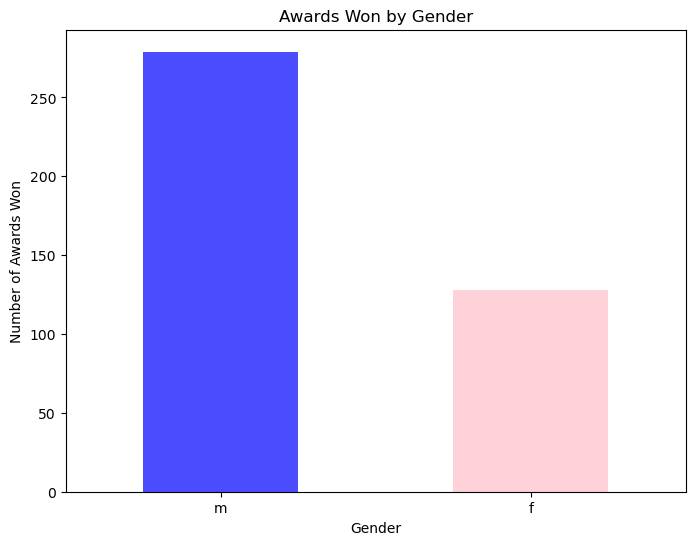

In [17]:
# Assuming you have the DataFrame 'hr'
awards_by_gender = hr[hr['Awards_Won'] == 1]['Gender'].value_counts()

# Create a bar plot to visualize awards won by each gender
plt.figure(figsize=(8, 6))
awards_by_gender.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
plt.title('Awards Won by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Awards Won')
plt.xticks(rotation=0)
plt.show()


# 7. Award won by each department

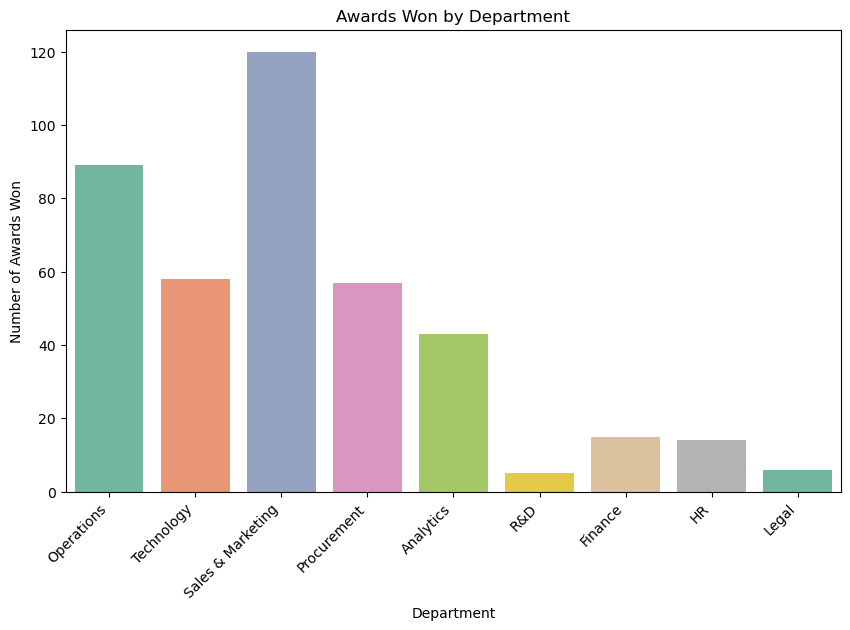

In [18]:
# Assuming you have the DataFrame 'hr'
awards_by_department = hr[hr['Awards_Won'] == 1]['Department'].value_counts()

# Create a count plot (bar plot) to visualize awards won by each department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', data=hr[hr['Awards_Won'] == 1], palette='Set2')
plt.title('Awards Won by Department')
plt.xlabel('Department')
plt.ylabel('Number of Awards Won')
plt.xticks(rotation=45, ha='right')  # Rotate and align department names for better readability
plt.show()


# 8. Awards won by each Age

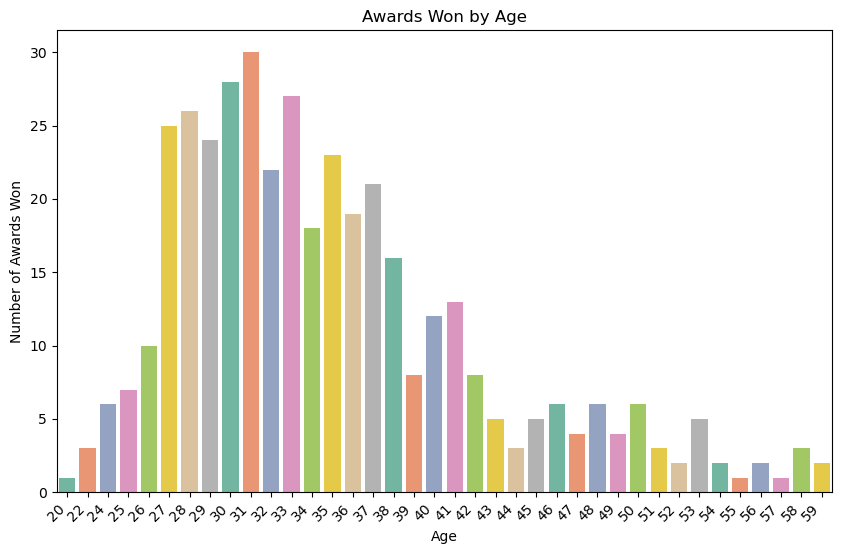

In [19]:
# Assuming you have the DataFrame 'hr'
awards_by_Age = hr[hr['Awards_Won'] == 1]['Age'].value_counts()

# Create a count plot (bar plot) to visualize awards won by each Age
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=hr[hr['Awards_Won'] == 1], palette='Set2')
plt.title('Awards Won by Age')
plt.xlabel('Age')
plt.ylabel('Number of Awards Won')
plt.xticks(rotation=45, ha='right')  # Rotate and align department names for better readability
plt.show()

In [20]:
# Assuming you have the DataFrame 'hr'
highest_age_awards_won = hr[hr['Awards_Won'] == 1]['Age'].max()

print("Highest Age of Employees who won awards:", highest_age_awards_won)


Highest Age of Employees who won awards: 59


# 9. Visualize training score by gender

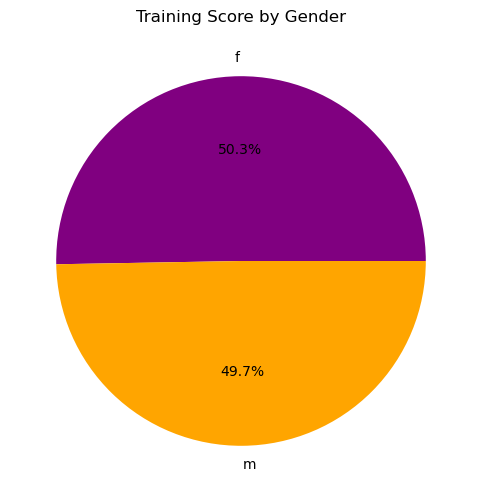

In [21]:
# Assuming you have the DataFrame 'hr'
avg_training_score_by_gender = hr.groupby('Gender')['Avg_Training_Score'].mean()

# Create a pie chart to visualize average training score by gender
plt.figure(figsize=(8, 6))
plt.pie(avg_training_score_by_gender, labels=avg_training_score_by_gender.index, autopct='%1.1f%%', colors=['purple', 'orange'])
plt.title('Training Score by Gender')
plt.show()


# 10. Visualize training score by department

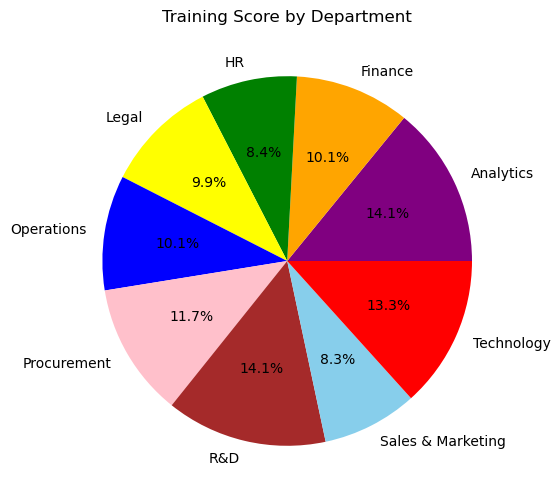

In [22]:
# Assuming you have the DataFrame 'hr'
avg_training_score_by_department = hr.groupby('Department')['Avg_Training_Score'].mean()

# Create a pie chart to visualize average training score by department
plt.figure(figsize=(8, 6))
plt.pie(avg_training_score_by_department, labels=avg_training_score_by_department.index, autopct='%1.1f%%', colors=['purple', 'orange','green','yellow','blue','pink','brown','skyblue','red'])
plt.title('Training Score by Department')
plt.show()

# 11. Correlation analysis and visualize the correlation matrix using a heatmap

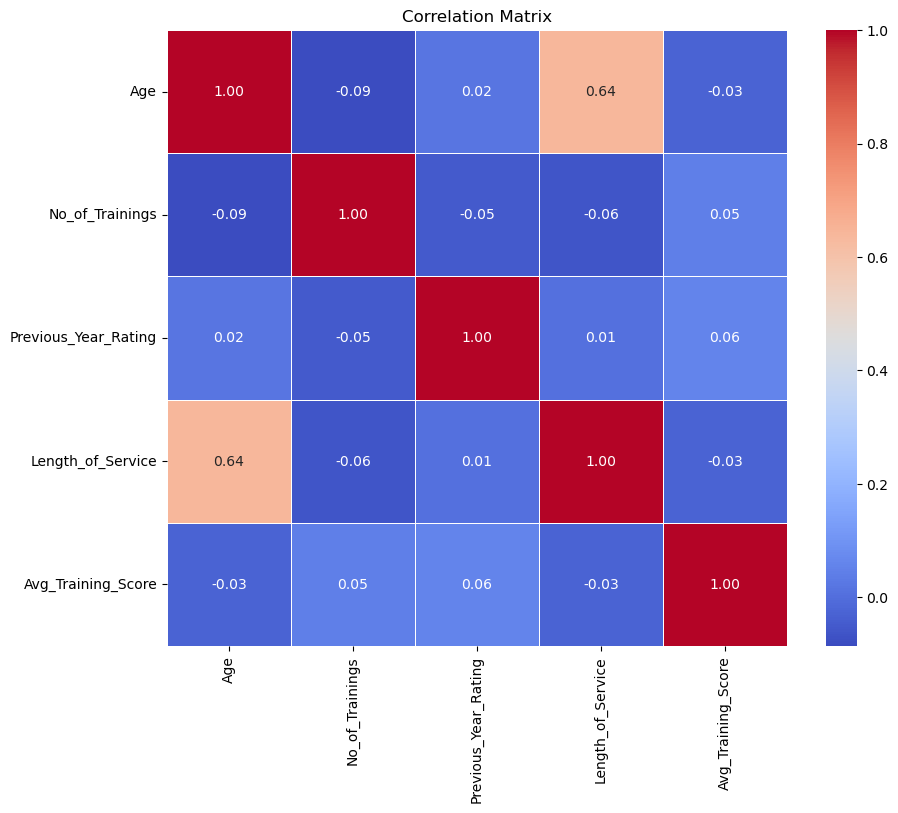

In [23]:
# Compute the correlation matrix
correlation_matrix = hr[numerical_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<center><h1 style="background-color:blue; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman;" >Feature Engineering </h1></center>

Feature engineering is an essential step in the data preprocessing pipeline, as it involves creating new features from existing ones that can improve the performance and interpretability of machine learning models or provide more meaningful insights during analysis.

# 1. One-Hot Encoding: 
 Convert categorical variables into numerical features using one-hot encoding. This creates binary columns for each category, making the data suitable for models that require numerical inputs.



In [24]:

# Assuming you have the DataFrame 'hr' with a categorical column 'Department'
# Perform one-hot encoding for the 'Department' column
hr_encoded = pd.get_dummies(hr, columns=['Department'])

# Display the first few rows of the encoded DataFrame
hr_encoded.head()


,Employee_ID,Region,Education,Gender,Recruitment_Channel,No_of_Trainings,Age,Previous_Year_Rating,Length_of_Service,KPIs_Met_More_Than_80,...,Avg_Training_Score,Department_Analytics,Department_Finance,Department_HR,Department_Legal,Department_Operations,Department_Procurement,Department_R&D,Department_Sales & Marketing,Department_Technology
0,8724,region_26,Bachelors,m,sourcing,1,24,3.345459,1,1,...,77,0,0,0,0,0,0,0,0,1
1,74430,region_4,Bachelors,f,other,1,31,3.000000,5,0,...,51,0,0,1,0,0,0,0,0,0
2,72255,region_13,Bachelors,m,other,1,31,1.000000,4,0,...,47,0,0,0,0,0,0,0,1,0
3,38562,region_2,Bachelors,f,other,3,31,2.000000,9,0,...,65,0,0,0,0,0,1,0,0,0
4,64486,region_29,Bachelors,m,sourcing,1,30,4.000000,7,0,...,61,0,1,0,0,0,0,0,0,0


# 2. Binning or Discretization:
 Convert continuous numerical variables into discrete bins or categories. This can help capture non-linear relationships between the target variable and the feature.



**There are different methods to perform binning:**

**1. Equal Width Binning:** Divide the range of the continuous variable into equal-width intervals. The width of each bin is the same, but the number of observations in each bin might vary.

**2. Equal Frequency Binning:** Divide the data into bins such that each bin contains roughly the same number of observations. The width of each bin might vary, but the number of observations is approximately equal.

**3. Custom Binning:** Define custom bins based on domain knowledge or specific requirements.

In [25]:
# Assuming you have the DataFrame 'hr' with a continuous numerical column 'Age'
# Perform equal width binning on the 'Age' column
num_bins = 5
hr['Age_Binned'] = pd.cut(hr['Age'], bins=num_bins)

# Display the first few rows of the DataFrame with the new binned column
hr['Age_Binned'] 


0        (19.96, 28.0]
1         (28.0, 36.0]
2         (28.0, 36.0]
3         (28.0, 36.0]
4         (28.0, 36.0]
             ...      
17412     (28.0, 36.0]
17413     (28.0, 36.0]
17414     (28.0, 36.0]
17415     (28.0, 36.0]
17416     (28.0, 36.0]
Name: Age_Binned, Length: 17417, dtype: category
Categories (5, interval[float64, right]): [(19.96, 28.0] < (28.0, 36.0] < (36.0, 44.0] < (44.0, 52.0] < (52.0, 60.0]]

# 3. Interaction Features:
 Create new features by taking interactions between two or more existing features. For example, multiplying age and number of trainings to capture the effect of age on the impact of training.

In [26]:
# Assuming you have the DataFrame 'hr' with columns 'Age' and 'No_of_Trainings'
# Create an interaction feature by multiplying 'Age' and 'No_of_Trainings'
hr['Age_Times_Trainings'] = hr['Age'] * hr['No_of_Trainings']

# Display the first few rows of the DataFrame with the new interaction feature
print("Age_Times_Trainings")
print(hr['Age_Times_Trainings'])


Age_Times_Trainings
0        24
1        31
2        31
3        93
4        30
         ..
17412    60
17413    33
17414    33
17415    33
17416    35
Name: Age_Times_Trainings, Length: 17417, dtype: int64


# 4. Polynomial Features:
 Generate polynomial features by raising existing features to higher powers. This can capture non-linear relationships between variables.

In [27]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming you have the DataFrame 'hr' with a numerical feature 'Age'
# Create polynomial features for 'Age'
degree = 2  # Degree of the polynomial features (e.g., 2 for quadratic, 3 for cubic)
poly = PolynomialFeatures(degree=degree, include_bias=False)
poly_features = poly.fit_transform(hr[['Age']])

# Create a DataFrame with the polynomial features
poly_df = pd.DataFrame(poly_features, columns=[f'Age^ {i}' for i in range(1, degree+1)])

# Concatenate the polynomial features with the original DataFrame 'hr'
hr = pd.concat([hr, poly_df], axis=1)

# Display the first few rows of the DataFrame with the new polynomial features
hr.head()


,Employee_ID,Department,Region,Education,Gender,Recruitment_Channel,No_of_Trainings,Age,Previous_Year_Rating,Length_of_Service,KPIs_Met_More_Than_80,Awards_Won,Avg_Training_Score,Age_Binned,Age_Times_Trainings,Age^ 1,Age^ 2
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,3.345459,1,1,0,77,"(19.96, 28.0]",24,24.0,576.0
1,74430,HR,region_4,Bachelors,f,other,1,31,3.000000,5,0,0,51,"(28.0, 36.0]",31,31.0,961.0
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.000000,4,0,0,47,"(28.0, 36.0]",31,31.0,961.0
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.000000,9,0,0,65,"(28.0, 36.0]",93,31.0,961.0
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.000000,7,0,0,61,"(28.0, 36.0]",30,30.0,900.0


# 5. Aggregation Features:
 Compute statistical aggregations (e.g., mean, median, min, max) for groups of data based on certain criteria. For example, average training score per department.

In [28]:
# Assuming you have the DataFrame 'hr' with columns 'Department' and 'Avg_Training_Score'
# Compute the average training score per department
avg_training_score_per_dept = hr.groupby('Department')['Avg_Training_Score'].mean()

# Display the average training score per department
print(avg_training_score_per_dept)


Department
Analytics            84.565115
Finance              60.326683
HR                   50.387755
Legal                59.533133
Operations           60.351589
Procurement          70.180357
R&D                  84.451807
Sales & Marketing    50.056614
Technology           79.847658
Name: Avg_Training_Score, dtype: float64


# 6. Ratio Features:
 Create features that represent the ratio between two existing features. This can be useful when certain relationships are better captured through ratios.

In [29]:
# Assuming you have the DataFrame 'hr' with columns 'Age' and 'No_of_Trainings'
# Create a ratio feature by dividing 'Age' by 'No_of_Trainings'
hr['Age_to_Trainings_Ratio'] = hr['Age'] / hr['No_of_Trainings']

# Display the first few rows of the DataFrame with the new ratio feature
print("Age_to_Trainings_Ratio")
print(hr['Age_to_Trainings_Ratio'])


Age_to_Trainings_Ratio
0        24.000000
1        31.000000
2        31.000000
3        10.333333
4        30.000000
           ...    
17412    15.000000
17413    33.000000
17414    33.000000
17415    33.000000
17416    35.000000
Name: Age_to_Trainings_Ratio, Length: 17417, dtype: float64


In [30]:
hr.to_csv("employees-performance-for-hr-analytics.csv")

<center><h1 style="background-color:blue; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman;" >Thank You </h1></center>